<a href="https://colab.research.google.com/github/Hareesh-S-T/ML-Project/blob/main/ML%20and%20DL%20with%20PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALLING REQUIRED PACKAGES

In [ ]:
!pip install pyspark --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install elephas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IMPORT STATEMENTS

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import threading
import elephas
from elephas import *
import splitfolders
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.mllib.evaluation import MulticlassMetrics
from keras.preprocessing.image import ImageDataGenerator
from elephas.utils.rdd_utils import to_simple_rdd
from elephas.spark_model import SparkModel
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications import VGG16
from keras.applications import ResNet50
from keras import optimizers
import cv2
from skimage.io import imread

# DATASET

### DOWNLOADING

In [ ]:
os.environ['KAGGLE_USERNAME'] = "hareeshtejas"
os.environ['KAGGLE_KEY'] = "c241d98c787b40b73cdea82bbb08bc61"

!kaggle datasets download -d ercanavsar/images-of-strawberry-leaves-for-tipburn-detection

100% 7.46G/7.47G [04:35<00:00, 26.4MB/s]
100% 7.47G/7.47G [04:35<00:00, 29.1MB/s]


In [ ]:
!unzip '/content/images-of-strawberry-leaves-for-tipburn-detection.zip'

Archive:  /content/images-of-strawberry-leaves-for-tipburn-detection.zip
  inflating: dataset - strawberry leaves/Calciumdeficiency/1.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/10.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/100.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1000.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1001.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1002.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1005.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1006.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1008.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1009.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/101.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1010.jpg  
  inflating: dataset - strawberry leaves/Calciumdeficiency/1011.jpg  
  inflating: dataset - s

In [ ]:
splitfolders.ratio('/content/dataset - strawberry leaves', output="data", seed=1337, ratio=(0.6, 0.2,0.2))

Copying files: 1431 files [00:42, 33.71 files/s]


### VISUALIZING

(3968, 2976, 3)


<Figure size 400x400 with 0 Axes>

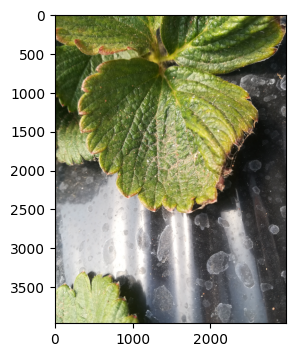

In [ ]:
#Diseased leaf
img1 = '/content/dataset - strawberry leaves/Calciumdeficiency/1009.jpg'
print(cv2.imread(img1).shape)
plt.figure(figsize=(4,4))
fig, ax = plt.subplots(figsize=(4,4))
img = imread(img1)
ax.imshow(img)

(5120, 3840, 3)


<Figure size 400x400 with 0 Axes>

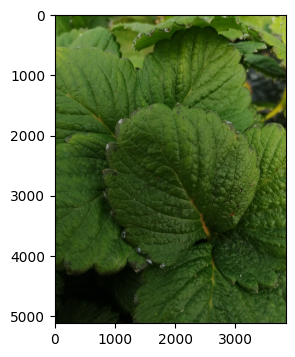

In [ ]:
#Diseased leaf
img2 = '/content/dataset - strawberry leaves/healthy/1085.jpg'
print(cv2.imread(img2).shape)
plt.figure(figsize=(4,4))
fig, ax = plt.subplots(figsize=(4,4))
img = imread(img2)
ax.imshow(img)

# SETTING UP ENVIRONMENT

In [ ]:
spark = SparkSession \
    .builder \
    .appName('Leaf disease classification') \
    .getOrCreate()

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
sc

<SparkContext master=local[*] appName=Leaf disease classification>

# MACHINE LEARNING MODEL

In [ ]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("glcm.csv"))

In [ ]:
#Print the top 5 rows of the dataset
df.show(5)

+---+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+-------------------+-----+
|_c0|               ASM_0|              ASM_45|              ASM_90|             ASM_135|        contrast_0|       contrast_45|       contrast_90|      contrast_135|   dissimilarity_0|  dissimilarity_45|  dissimilarity_90| dissimilarity_135|     correlation_0|    correlation_45|    correlation_90|   correlation_135|      homogeneity_0|      homogeneity_45|      homogeneity_90|    homogeneity_135|label|
+---+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+----

In [ ]:
# How many rows we have
df.count()

1431

In [ ]:
len(df.columns)

22

In [ ]:
df.dtypes

[('_c0', 'string'),
 ('ASM_0', 'string'),
 ('ASM_45', 'string'),
 ('ASM_90', 'string'),
 ('ASM_135', 'string'),
 ('contrast_0', 'string'),
 ('contrast_45', 'string'),
 ('contrast_90', 'string'),
 ('contrast_135', 'string'),
 ('dissimilarity_0', 'string'),
 ('dissimilarity_45', 'string'),
 ('dissimilarity_90', 'string'),
 ('dissimilarity_135', 'string'),
 ('correlation_0', 'string'),
 ('correlation_45', 'string'),
 ('correlation_90', 'string'),
 ('correlation_135', 'string'),
 ('homogeneity_0', 'string'),
 ('homogeneity_45', 'string'),
 ('homogeneity_90', 'string'),
 ('homogeneity_135', 'string'),
 ('label', 'string')]

In [ ]:
# Cast numeric columns
dataset = df.select(col('_c0').cast('float'),
                    col('ASM_0').cast('float'),
                    col('ASM_45').cast('float'),
                    col('ASM_90').cast('float'),
                    col('ASM_135').cast('float'),
                    col('contrast_0').cast('float'),
                    col('contrast_45').cast('float'),
                    col('contrast_90').cast('float'),
                    col('contrast_135').cast('float'),
                    col('dissimilarity_0').cast('float'),
                    col('dissimilarity_45').cast('float'),
                    col('dissimilarity_90').cast('float'),
                    col('dissimilarity_135').cast('float'),
                    col('correlation_0').cast('float'),
                    col('correlation_45').cast('float'),
                    col('correlation_90').cast('float'),
                    col('correlation_135').cast('float'),
                    col('homogeneity_0').cast('float'),
                    col('homogeneity_45').cast('float'),
                    col('homogeneity_90').cast('float'),
                    col('homogeneity_135').cast('float'),
                    col('label').cast('float'))

dataset.show()

+----+------------+------------+------------+------------+----------+-----------+-----------+------------+---------------+----------------+----------------+-----------------+-------------+--------------+--------------+---------------+-------------+--------------+--------------+---------------+-----+
| _c0|       ASM_0|      ASM_45|      ASM_90|     ASM_135|contrast_0|contrast_45|contrast_90|contrast_135|dissimilarity_0|dissimilarity_45|dissimilarity_90|dissimilarity_135|correlation_0|correlation_45|correlation_90|correlation_135|homogeneity_0|homogeneity_45|homogeneity_90|homogeneity_135|label|
+----+------------+------------+------------+------------+----------+-----------+-----------+------------+---------------+----------------+----------------+-----------------+-------------+--------------+--------------+---------------+-------------+--------------+--------------+---------------+-----+
| 0.0|1.1782412E-4|1.1581074E-4|1.2279594E-4|1.1441806E-4|  765.4759|   818.4702|  729.95776|    

In [ ]:
dataset.dtypes

[('_c0', 'float'),
 ('ASM_0', 'float'),
 ('ASM_45', 'float'),
 ('ASM_90', 'float'),
 ('ASM_135', 'float'),
 ('contrast_0', 'float'),
 ('contrast_45', 'float'),
 ('contrast_90', 'float'),
 ('contrast_135', 'float'),
 ('dissimilarity_0', 'float'),
 ('dissimilarity_45', 'float'),
 ('dissimilarity_90', 'float'),
 ('dissimilarity_135', 'float'),
 ('correlation_0', 'float'),
 ('correlation_45', 'float'),
 ('correlation_90', 'float'),
 ('correlation_135', 'float'),
 ('homogeneity_0', 'float'),
 ('homogeneity_45', 'float'),
 ('homogeneity_90', 'float'),
 ('homogeneity_135', 'float'),
 ('label', 'float')]

### MAPREDUCE ANALYSIS

In [ ]:
## See if we are have missing values
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

+---+-----+------+------+-------+----------+-----------+-----------+------------+---------------+----------------+----------------+-----------------+-------------+--------------+--------------+---------------+-------------+--------------+--------------+---------------+-----+
|_c0|ASM_0|ASM_45|ASM_90|ASM_135|contrast_0|contrast_45|contrast_90|contrast_135|dissimilarity_0|dissimilarity_45|dissimilarity_90|dissimilarity_135|correlation_0|correlation_45|correlation_90|correlation_135|homogeneity_0|homogeneity_45|homogeneity_90|homogeneity_135|label|
+---+-----+------+------+-------+----------+-----------+-----------+------------+---------------+----------------+----------------+-----------------+-------------+--------------+--------------+---------------+-------------+--------------+--------------+---------------+-----+
|  0|    0|     0|     0|      0|         0|          0|          0|           0|              0|               0|               0|                0|            0|         

In [ ]:
DF_Healthy=dataset.filter('label = 0')
DF_Diseased=dataset.filter('label = 1')

In [ ]:
D_ASM_0_sum = sc.accumulator(0)
D_ASM_45_sum = sc.accumulator(0)
D_ASM_90_sum = sc.accumulator(0)
D_ASM_135_sum = sc.accumulator(0)
D_contrast_0_sum = sc.accumulator(0)
D_contrast_45_sum = sc.accumulator(0)
D_contrast_90_sum = sc.accumulator(0)
D_contrast_135_sum = sc.accumulator(0)
D_dissimilarity_0_sum = sc.accumulator(0)
D_dissimilarity_45_sum = sc.accumulator(0)
D_dissimilarity_90_sum = sc.accumulator(0)
D_dissimilarity_135_sum = sc.accumulator(0)
D_correlation_0_sum = sc.accumulator(0)
D_correlation_45_sum = sc.accumulator(0)
D_correlation_90_sum = sc.accumulator(0)
D_correlation_135_sum = sc.accumulator(0)
D_homogeneity_0_sum = sc.accumulator(0)
D_homogeneity_45_sum = sc.accumulator(0)
D_homogeneity_90_sum = sc.accumulator(0)
D_homogeneity_135_sum = sc.accumulator(0)
H_ASM_0_sum = sc.accumulator(0)
H_ASM_45_sum = sc.accumulator(0)
H_ASM_90_sum = sc.accumulator(0)
H_ASM_135_sum = sc.accumulator(0)
H_contrast_0_sum = sc.accumulator(0)
H_contrast_45_sum = sc.accumulator(0)
H_contrast_90_sum = sc.accumulator(0)
H_contrast_135_sum = sc.accumulator(0)
H_dissimilarity_0_sum = sc.accumulator(0)
H_dissimilarity_45_sum = sc.accumulator(0)
H_dissimilarity_90_sum = sc.accumulator(0)
H_dissimilarity_135_sum = sc.accumulator(0)
H_correlation_0_sum = sc.accumulator(0)
H_correlation_45_sum = sc.accumulator(0)
H_correlation_90_sum = sc.accumulator(0)
H_correlation_135_sum = sc.accumulator(0)
H_homogeneity_0_sum = sc.accumulator(0)
H_homogeneity_45_sum = sc.accumulator(0)
H_homogeneity_90_sum = sc.accumulator(0)
H_homogeneity_135_sum = sc.accumulator(0)

In [ ]:
def colSum(row, diseased):
  if diseased==True:
    D_ASM_0_sum.add(row.ASM_0)
    D_ASM_45_sum.add(row.ASM_45)
    D_ASM_90_sum.add(row.ASM_90)
    D_ASM_135_sum.add(row.ASM_135)
    D_contrast_0_sum.add(row.contrast_0)
    D_contrast_45_sum.add(row.contrast_45)
    D_contrast_90_sum.add(row.contrast_90)
    D_contrast_135_sum.add(row.contrast_135)
    D_dissimilarity_0_sum.add(row.dissimilarity_0)
    D_dissimilarity_45_sum.add(row.dissimilarity_45)
    D_dissimilarity_90_sum.add(row.dissimilarity_90)
    D_dissimilarity_135_sum.add(row.dissimilarity_135)
    D_correlation_0_sum.add(row.correlation_0)
    D_correlation_45_sum.add(row.correlation_45)
    D_correlation_90_sum.add(row.correlation_90)
    D_correlation_135_sum.add(row.correlation_135)
    D_homogeneity_0_sum.add(row.homogeneity_0)
    D_homogeneity_45_sum.add(row.homogeneity_45)
    D_homogeneity_90_sum.add(row.homogeneity_90)
    D_homogeneity_135_sum.add(row.homogeneity_135)
  else:
    H_ASM_0_sum.add(row.ASM_0)
    H_ASM_45_sum.add(row.ASM_45)
    H_ASM_90_sum.add(row.ASM_90)
    H_ASM_135_sum.add(row.ASM_135)
    H_contrast_0_sum.add(row.contrast_0)
    H_contrast_45_sum.add(row.contrast_45)
    H_contrast_90_sum.add(row.contrast_90)
    H_contrast_135_sum.add(row.contrast_135)
    H_dissimilarity_0_sum.add(row.dissimilarity_0)
    H_dissimilarity_45_sum.add(row.dissimilarity_45)
    H_dissimilarity_90_sum.add(row.dissimilarity_90)
    H_dissimilarity_135_sum.add(row.dissimilarity_135)
    H_correlation_0_sum.add(row.correlation_0)
    H_correlation_45_sum.add(row.correlation_45)
    H_correlation_90_sum.add(row.correlation_90)
    H_correlation_135_sum.add(row.correlation_135)
    H_homogeneity_0_sum.add(row.homogeneity_0)
    H_homogeneity_45_sum.add(row.homogeneity_45)
    H_homogeneity_90_sum.add(row.homogeneity_90)
    H_homogeneity_135_sum.add(row.homogeneity_135)

In [ ]:
DF_Healthy.foreach(lambda row: colSum(row,diseased=False))
DF_Diseased.foreach(lambda row: colSum(row,diseased=True))

In [ ]:
rowCountD=DF_Diseased.count()
rowCountH=DF_Healthy.count()

print(rowCountD)
print(rowCountH)

805
626


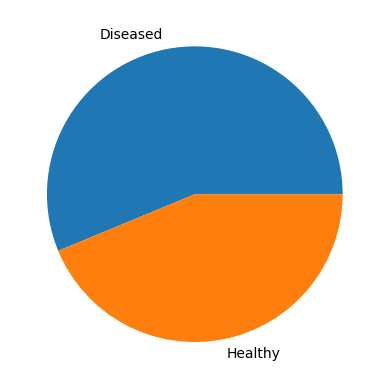

In [ ]:
y = np.array([rowCountD, rowCountH])
mylabels=['Diseased','Healthy']

plt.pie(y, labels=mylabels)
plt.show()

In [ ]:
D_ASM_0_mean = D_ASM_0_sum.value/rowCountD
D_ASM_45_mean = D_ASM_45_sum.value/rowCountD
D_ASM_90_mean = D_ASM_90_sum.value/rowCountD
D_ASM_135_mean = D_ASM_135_sum.value/rowCountD
D_contrast_0_mean = D_contrast_0_sum.value/rowCountD
D_contrast_45_mean = D_contrast_45_sum.value/rowCountD
D_contrast_90_mean = D_contrast_90_sum.value/rowCountD
D_contrast_135_mean = D_contrast_135_sum.value/rowCountD
D_dissimilarity_0_mean = D_dissimilarity_0_sum.value/rowCountD
D_dissimilarity_45_mean = D_dissimilarity_45_sum.value/rowCountD
D_dissimilarity_90_mean = D_dissimilarity_90_sum.value/rowCountD
D_dissimilarity_135_mean = D_dissimilarity_135_sum.value/rowCountD
D_correlation_0_mean = D_correlation_0_sum.value/rowCountD
D_correlation_45_mean = D_correlation_45_sum.value/rowCountD
D_correlation_90_mean = D_correlation_90_sum.value/rowCountD
D_correlation_135_mean = D_correlation_135_sum.value/rowCountD
D_homogeneity_0_mean = D_homogeneity_0_sum.value/rowCountD
D_homogeneity_45_mean = D_homogeneity_45_sum.value/rowCountD
D_homogeneity_90_mean = D_homogeneity_90_sum.value/rowCountD
D_homogeneity_135_mean = D_homogeneity_135_sum.value/rowCountD
H_ASM_0_mean = H_ASM_0_sum.value/rowCountH
H_ASM_45_mean = H_ASM_45_sum.value/rowCountH
H_ASM_90_mean = H_ASM_90_sum.value/rowCountH
H_ASM_135_mean = H_ASM_135_sum.value/rowCountH
H_contrast_0_mean = H_contrast_0_sum.value/rowCountH
H_contrast_45_mean = H_contrast_45_sum.value/rowCountH
H_contrast_90_mean = H_contrast_90_sum.value/rowCountH
H_contrast_135_mean = H_contrast_135_sum.value/rowCountH
H_dissimilarity_0_mean = H_dissimilarity_0_sum.value/rowCountH
H_dissimilarity_45_mean = H_dissimilarity_45_sum.value/rowCountH
H_dissimilarity_90_mean = H_dissimilarity_90_sum.value/rowCountH
H_dissimilarity_135_mean = H_dissimilarity_135_sum.value/rowCountH
H_correlation_0_mean = H_correlation_0_sum.value/rowCountH
H_correlation_45_mean = H_correlation_45_sum.value/rowCountH
H_correlation_90_mean = H_correlation_90_sum.value/rowCountH
H_correlation_135_mean = H_correlation_135_sum.value/rowCountH
H_homogeneity_0_mean = H_homogeneity_0_sum.value/rowCountH
H_homogeneity_45_mean = H_homogeneity_45_sum.value/rowCountH
H_homogeneity_90_mean = H_homogeneity_90_sum.value/rowCountH
H_homogeneity_135_mean =H_homogeneity_135_sum.value/rowCountH

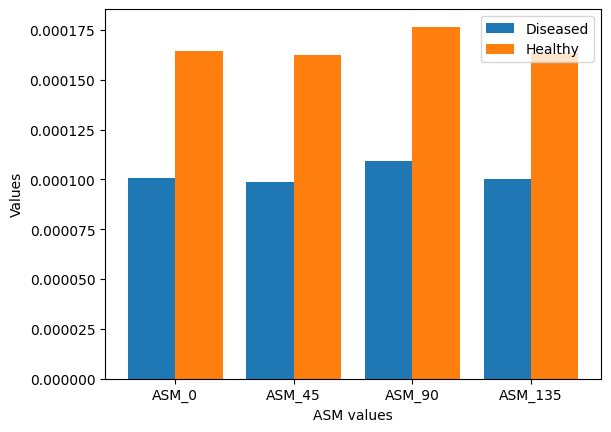

In [ ]:
X = ['ASM_0','ASM_45','ASM_90','ASM_135']

Diseased = [D_ASM_0_mean,D_ASM_45_mean,D_ASM_90_mean,D_ASM_135_mean]
Healthy = [H_ASM_0_mean,H_ASM_45_mean,H_ASM_90_mean,H_ASM_135_mean]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Diseased, 0.4, label = 'Diseased')
plt.bar(X_axis + 0.2, Healthy, 0.4, label = 'Healthy')

plt.xticks(X_axis, X)
plt.xlabel("ASM values")
plt.ylabel("Values")
plt.legend()
plt.show()

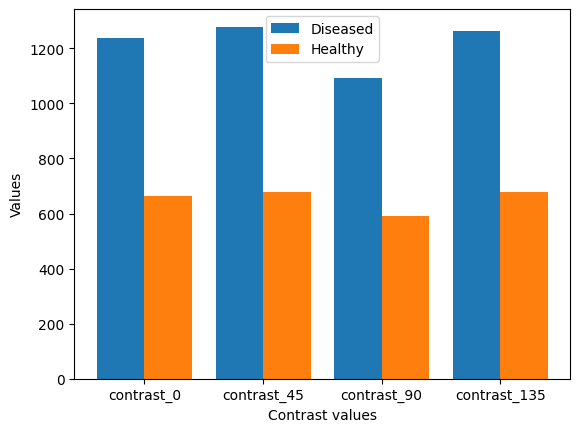

In [ ]:
X = ['contrast_0','contrast_45','contrast_90','contrast_135']

Diseased = [D_contrast_0_mean,D_contrast_45_mean,D_contrast_90_mean,D_contrast_135_mean]
Healthy = [H_contrast_0_mean,H_contrast_45_mean,H_contrast_90_mean,H_contrast_135_mean]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Diseased, 0.4, label = 'Diseased')
plt.bar(X_axis + 0.2, Healthy, 0.4, label = 'Healthy')

plt.xticks(X_axis, X)
plt.xlabel("Contrast values")
plt.ylabel("Values")
plt.legend()
plt.show()

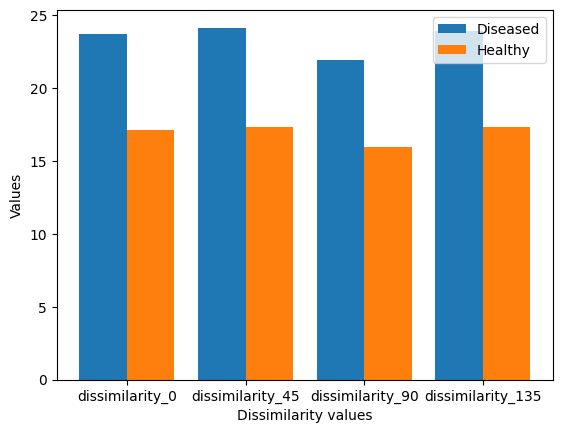

In [ ]:
X = ['dissimilarity_0','dissimilarity_45','dissimilarity_90','dissimilarity_135']

Diseased = [D_dissimilarity_0_mean,D_dissimilarity_45_mean,D_dissimilarity_90_mean,D_dissimilarity_135_mean]
Healthy = [H_dissimilarity_0_mean,H_dissimilarity_45_mean,H_dissimilarity_90_mean,H_dissimilarity_135_mean]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Diseased, 0.4, label = 'Diseased')
plt.bar(X_axis + 0.2, Healthy, 0.4, label = 'Healthy')

plt.xticks(X_axis, X)
plt.xlabel("Dissimilarity values")
plt.ylabel("Values")
plt.legend()
plt.show()

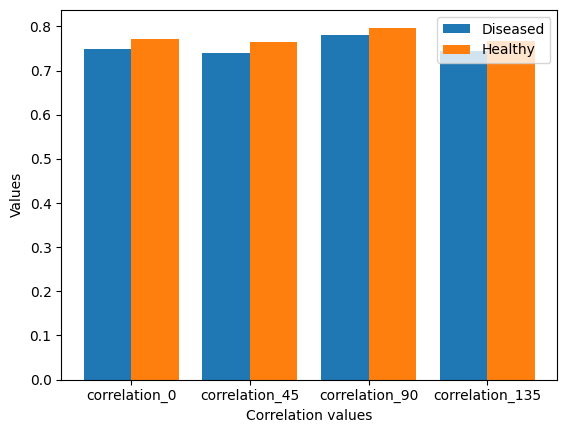

In [ ]:
X = ['correlation_0','correlation_45','correlation_90','correlation_135']

Diseased = [D_correlation_0_mean,D_correlation_45_mean,D_correlation_90_mean,D_correlation_135_mean]
Healthy = [H_correlation_0_mean,H_correlation_45_mean,H_correlation_90_mean,H_correlation_135_mean]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Diseased, 0.4, label = 'Diseased')
plt.bar(X_axis + 0.2, Healthy, 0.4, label = 'Healthy')

plt.xticks(X_axis, X)
plt.xlabel("Correlation values")
plt.ylabel("Values")
plt.legend()
plt.show()

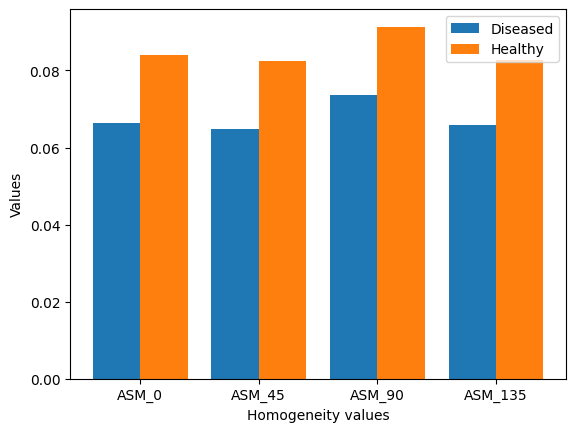

In [ ]:
X = ['ASM_0','ASM_45','ASM_90','ASM_135']

Diseased = [D_homogeneity_0_mean,D_homogeneity_45_mean,D_homogeneity_90_mean,D_homogeneity_135_mean]
Healthy = [H_homogeneity_0_mean,H_homogeneity_45_mean,H_homogeneity_90_mean,H_homogeneity_135_mean]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Diseased, 0.4, label = 'Diseased')
plt.bar(X_axis + 0.2, Healthy, 0.4, label = 'Healthy')

plt.xticks(X_axis, X)
plt.xlabel("Homogeneity values")
plt.ylabel("Values")
plt.legend()
plt.show()

### FITTING RF CLASSIFIER

In [ ]:
required_features = ['ASM_0','ASM_45','ASM_90','ASM_135','contrast_0','contrast_45','contrast_135','contrast_90','dissimilarity_0',
                     'dissimilarity_45','dissimilarity_90','dissimilarity_135','correlation_0','correlation_45','correlation_90',
                     'correlation_135','homogeneity_0','homogeneity_45','homogeneity_90','homogeneity_135']

assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)

In [ ]:
transformed_data.show()

+----+------------+------------+------------+------------+----------+-----------+-----------+------------+---------------+----------------+----------------+-----------------+-------------+--------------+--------------+---------------+-------------+--------------+--------------+---------------+-----+--------------------+
| _c0|       ASM_0|      ASM_45|      ASM_90|     ASM_135|contrast_0|contrast_45|contrast_90|contrast_135|dissimilarity_0|dissimilarity_45|dissimilarity_90|dissimilarity_135|correlation_0|correlation_45|correlation_90|correlation_135|homogeneity_0|homogeneity_45|homogeneity_90|homogeneity_135|label|            features|
+----+------------+------------+------------+------------+----------+-----------+-----------+------------+---------------+----------------+----------------+-----------------+-------------+--------------+--------------+---------------+-------------+--------------+--------------+---------------+-----+--------------------+
| 0.0|1.1782412E-4|1.1581074E-4|1.

In [ ]:
# Split the data into 80:20 ratio
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [ ]:
# Define the model
rf = RandomForestClassifier(labelCol='label',
                            featuresCol='features',
                            maxDepth=5,
                            numTrees=25,
                            impurity='entropy'
                            )

In [ ]:
ml_start = time.time()

In [ ]:
# Fit the model
model = rf.fit(training_data)

In [ ]:
model.save('/content/MLmodel.h5')

In [ ]:
ml_end = time.time()

In [ ]:
# Predict with the test dataset
predictions = model.transform(test_data)

In [ ]:
# Evaluate our model
evaluator = MulticlassClassificationEvaluator(
    labelCol='label',
    metricName='accuracy')

In [ ]:
# Accuracy
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy)

Test Accuracy =  0.8850574712643678


In [ ]:
new_df = predictions.select("label","prediction")

In [ ]:
metrics = MulticlassMetrics(new_df.rdd.map(tuple))
cm = metrics.confusionMatrix().toArray()
print(cm)

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[[ 86.   9.]
 [ 21. 145.]]


In [ ]:
# Overall statistics
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
f1Score = metrics.fMeasure(1.0)
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.9415584415584416
Recall = 0.8734939759036144
F1 Score = 0.9062499999999999


<Axes: >

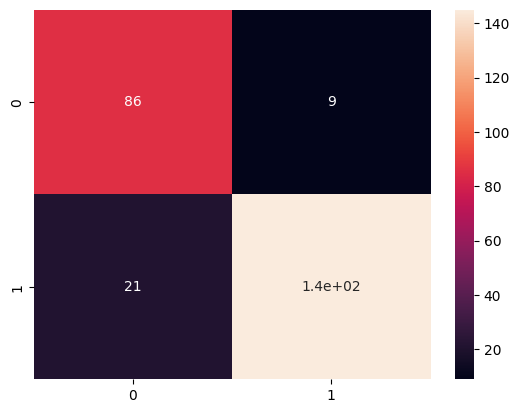

In [ ]:
sns.heatmap(cm,annot=True)

# DEEP LEARNING MODEL

In [ ]:
train_data_dir = '/content/dataset - strawberry leaves'
validation_data_dir = '/content/data/val'
test_data_dir = '/content/data/test'

img_width, img_height = 300,300

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    zoom_range = 0.2,
    rescale= 1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical')

Found 1431 images belonging to 2 classes.
Found 286 images belonging to 2 classes.


In [ ]:
batch_size = 32
epochs = 20
num_classes = 2

In [ ]:
train_rdd = to_simple_rdd(sc, train_generator[0], train_generator[1])

### CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
dl_cnn_start = time.time()

In [ ]:
spark_model_cnn = SparkModel(model, frequency='epoch', mode='asynchronous')
spark_model_cnn.fit(train_rdd, epochs=epochs, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:28] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:28] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:32] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:33] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:35] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:35] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:37] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:38] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:40] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:41] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:43] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:22:44] "GET /parameters

>>> Async training complete.


INFO:werkzeug:172.28.0.12 - - [08/May/2023 15:24:07] "GET /parameters HTTP/1.1" 200 -


In [ ]:
dl_cnn_end = time.time()

In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)
print("Loss: ",(scores[0]))
print("Accuracy: ",(scores[1]))

9/9 [==============================] - 125s 13s/step - loss: 0.7620 - accuracy: 0.5629
Loss:  0.7619968056678772
Accuracy:  0.5629370808601379


### TRANSFER LEARNING - VGG16

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add new trainable layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
dl_vgg_start = time.time()

In [ ]:
spark_model_tf = SparkModel(model, frequency='epoch', mode='asynchronous')

# Fit the SparkModel
spark_model_tf.fit(train_rdd, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:38] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:38] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:40] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:41] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:41] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:41] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:43] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:44] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:44] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:44] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:46] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:53:47] "POST /update HT

>>> Async training complete.


INFO:werkzeug:172.28.0.12 - - [08/May/2023 14:54:02] "GET /parameters HTTP/1.1" 200 -


In [ ]:
dl_vgg_end = time.time()

In [ ]:
scores_vgg = spark_model_tf.master_network.evaluate(val_generator, verbose=0)
print("Loss: ", scores_vgg[0])
print("Accuracy: ", scores_vgg[1])

Loss:  1.2398120164871216
Accuracy:  0.43706294894218445


# WITHOUT PYSPARK

## RANDOM FOREST CLASSIFIER


In [ ]:
glcm_df = pd.read_csv('/content/glcm.csv')

In [ ]:
#Marking the X and y features

X_data = glcm_df.iloc[:,1:21]
y_data = glcm_df['label']

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the training and test data in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,train_size=0.8,random_state=42)
print(X_train.shape) #The shape of X_train
print(y_train.shape) #The shape of y_train
print(X_test.shape)
print(y_test.shape)

(1144, 20)
(1144,)
(287, 20)
(287,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Fitting the RandomForestClassifier model

model = RandomForestClassifier(max_depth = 5, max_features = 10,criterion='entropy', n_estimators=25,random_state=11)

In [ ]:
ml_wo_spark_start = time.time()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       n_estimators=25, random_state=11)

In [ ]:
ml_wo_spark_end = time.time()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.8397212543554007


## CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
dl_cnn_wo_start = time.time()

In [ ]:
model.fit(train_generator, epochs=3, batch_size=32)

Epoch 1/3
45/45 [==============================] - 559s 12s/step - loss: 0.6274 - accuracy: 0.6639
Epoch 2/3
45/45 [==============================] - 549s 12s/step - loss: 0.4178 - accuracy: 0.8267
Epoch 3/3
45/45 [==============================] - 566s 13s/step - loss: 0.3165 - accuracy: 0.8714


In [ ]:
dl_cnn_wo_end = time.time()

## TRANSFER LEARNING - VGG16

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add new trainable layers
vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
dl_vgg_wo_start = time.time()

In [ ]:
vgg_model.fit(train_generator, epochs=3, batch_size=32)

Epoch 1/3
45/45 [==============================] - 560s 12s/step - loss: 2.0296 - accuracy: 0.8050
Epoch 2/3
45/45 [==============================] - 577s 13s/step - loss: 0.1073 - accuracy: 0.9720
Epoch 3/3
45/45 [==============================] - 559s 12s/step - loss: 0.0522 - accuracy: 0.9825


In [ ]:
dl_vgg_wo_end = time.time()

# COMPARISON

## TIME TAKEN

In [ ]:
ml_time = ml_end - ml_start

In [ ]:
dl_cnn_time = dl_cnn_end - dl_cnn_start

In [ ]:
dl_vgg_time = dl_vgg_end - dl_vgg_start

In [ ]:
ml_wo_time = ml_wo_spark_end - ml_wo_spark_start

In [ ]:
dl_cnn_wo_time = dl_cnn_wo_end - dl_cnn_wo_start

In [ ]:
dl_vgg_wo_time = dl_vgg_wo_end - dl_vgg_wo_start

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = ['Random Forest','Proposed method','VGG 16']

With_spark = [ml_time,dl_cnn_time,dl_vgg_time]
without_spark = [ml_wo_time,dl_cnn_wo_time,dl_vgg_wo_time]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, With_spark, 0.4, label = 'With Spark')
plt.bar(X_axis + 0.2, without_spark, 0.4, label = 'Without Spark')

plt.xticks(X_axis, X)
plt.xlabel("Classifier")
plt.ylabel("Time taken")
plt.legend()
plt.show()

## ACCURACY COMPARISON

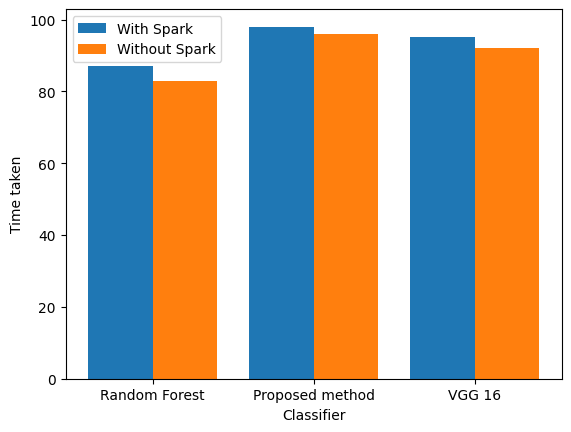

In [ ]:
X = ['Random Forest','Proposed method','VGG 16']

With_spark = [87,98,95]
without_spark = [83,96,92]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, With_spark, 0.4, label = 'With Spark')
plt.bar(X_axis + 0.2, without_spark, 0.4, label = 'Without Spark')

plt.xticks(X_axis, X)
plt.xlabel("Classifier")
plt.ylabel("Time taken")
plt.legend()
plt.show()

### EPOCHS = 5

In [ ]:
spark_model_cnn.fit(train_rdd, epochs=5, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:19] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:19] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:21] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:21] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:21] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:21] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:22] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:23] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:23] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:23] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:24] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:13:24] "POST /update HT

>>> Async training complete.


In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)

9/9 [==============================] - 110s 12s/step - loss: 0.7007 - accuracy: 0.4476


### EPOCHS = 10

In [ ]:
spark_model_cnn.fit(train_rdd, epochs=10, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:42] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:43] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:45] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:46] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:46] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:46] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:48] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:48] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:48] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:48] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:49] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:19:49] "POST /update HT

>>> Async training complete.


In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)

9/9 [==============================] - 120s 13s/step - loss: 0.6948 - accuracy: 0.3881


### EPOCHS = 25

In [ ]:
spark_model_cnn.fit(train_rdd, epochs=25, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:13] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:13] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:15] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:15] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:15] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:15] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:17] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:17] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:17] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:17] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:18] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:25:18] "POST /update HT

>>> Async training complete.


In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)

9/9 [==============================] - 109s 12s/step - loss: 0.6977 - accuracy: 0.4545


### EPOCHS = 50

In [ ]:
spark_model_cnn.fit(train_rdd, epochs=50, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:13] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:13] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:13] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:14] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:14] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:14] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:15] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:15] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:15] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:15] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:16] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:29:16] "POST /update HT

>>> Async training complete.


In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)

9/9 [==============================] - 108s 11s/step - loss: 0.6914 - accuracy: 0.5280


### EPOCHS = 75

In [ ]:
spark_model_cnn.fit(train_rdd, epochs=75, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:43] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:44] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:44] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:45] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:45] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:45] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:46] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:46] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:46] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:46] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:47] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:33:48] "POST /update HT

>>> Async training complete.


In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)

9/9 [==============================] - 116s 12s/step - loss: 0.6894 - accuracy: 0.5699


### EPOCHS = 100

In [ ]:
spark_model_cnn.fit(train_rdd, epochs=100, batch_size=32)

>>> Fit model
 * Serving Flask app 'elephas.parameter.server'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://172.28.0.12:4000
INFO:werkzeug:Press CTRL+C to quit


>>> Initialize workers
>>> Distribute load


INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:57] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:58] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:58] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:59] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:59] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:59] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:40:59] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:41:00] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:41:00] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:41:00] "GET /parameters HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:41:00] "POST /update HTTP/1.1" 200 -
INFO:werkzeug:172.28.0.12 - - [12/Apr/2023 18:41:00] "POST /update HT

>>> Async training complete.


In [ ]:
scores = spark_model_cnn.master_network.evaluate(val_generator)

9/9 [==============================] - 112s 12s/step - loss: 0.6888 - accuracy: 0.5804


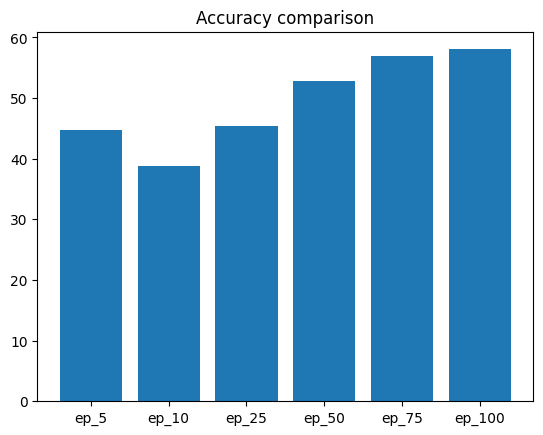

In [ ]:
x = np.array(['ep_5','ep_10','ep_25','ep_50','ep_75','ep_100'])
y = np.array([44.76,38.81,45.45,52.80,57,58.04])

plt.bar(x,y)
plt.title("Accuracy comparison")
plt.show()